In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Image

# Show and save numpy arrays

18x18 Gaussian Noise

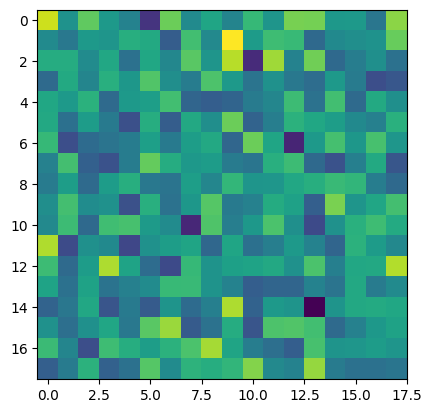

In [2]:
# Create and Display 18x18 pixel image of gaussian noise.
randn_18x18 = np.random.randn(18,18)
plt.imshow(randn_18x18, interpolation="nearest")
plt.show()


plt.imsave('images/18x18.png', randn_18x18)

84x84 Gaussian Noise

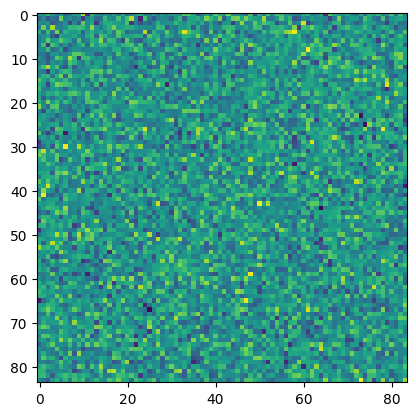

In [3]:
# Create and Display 84x84 pixel image of gaussian noise.
shape = (84,84)
randn_84x84 = np.random.randn(*shape)
plt.imshow(randn_84x84, interpolation="nearest")

plt.imsave('images/84x84.png', randn_84x84)

# Reading Images
use `cv.imread(filename, imread_flag)`

Imread Flags:

`cv.IMREAD_UNCHANGED`   : Return the loaded image as is (with alpha channel, otherwise it gets cropped). Ignore EXIF orientation.

`cv.IMREAD_GRAYSCALE`   : Always convert image to the single channel grayscale image (codec internal conversion).

`cv.IMREAD_COLOR`   : Always convert image to the 3 channel BGR color image.

`cv.IMREAD_ANYDEPTH`   : Return 16-bit/32-bit image when the input has the corresponding depth, otherwise convert it to 8-bit.

`cv.IMREAD_ANYCOLOR`   : The image is read in any possible color format.

`cv.IMREAD_LOAD_GDAL`   : Use the gdal driver for loading the image.

`cv.IMREAD_REDUCED_GRAYSCALE_2`   : Always convert image to the single channel grayscale image and the image size reduced 1/2.

`cv.IMREAD_REDUCED_COLOR_2`   : Always convert image to the 3 channel BGR color image and the image size reduced 1/2.

`cv.IMREAD_REDUCED_GRAYSCALE_4`   : Always convert image to the single channel grayscale image and the image size reduced 1/4.

`cv.IMREAD_REDUCED_COLOR_4`   : Always convert image to the 3 channel BGR color image and the image size reduced 1/4.

`cv.IMREAD_REDUCED_GRAYSCALE_8`   : Always convert image to the single channel grayscale image and the image size reduced 1/8.

`cv.IMREAD_REDUCED_COLOR_8`   : Always convert image to the 3 channel BGR color image and the image size reduced 1/8.

`cv.IMREAD_IGNORE_ORIENTATION`   : Do not rotate the image according to EXIF's orientation flag.

In [4]:
# Load image with opencv
cv_18x18 = cv.imread("images/18x18.png",cv.IMREAD_GRAYSCALE)

print(cv_18x18)  # 0-255 as uint8 type stores information in 8-bits

[[196 110 157 114 103  65 162 107 121 104 137 112 167 166 113 114  98 174]
 [107  98 114 112 128 124  86 144 106 215 115 142 138  91 106 109 110 161]
 [127 127 107 123  95 122 105 154 112 189  60 181 103 164  91 101 109  95]
 [ 92 124 104 129 113 151 109 100 149 114  97 110  98  93 114 100  79  83]
 [122 114 131  92 114 117 144  90  86  89 100 105 141  96 144  92 124 109]
 [124  95 116  99  80 127  86 124 109 162  89 101 131 122 116 106 102 130]
 [137  79  92  97 100 117  99 116 124  90 162 121  56 114 145 113 146 113]
 [103 144  87  81 100 159 127 113 116 100  97 129 141  91  81 102 124  83]
 [100 116  92 116 128  98  97 117 105 135 112 113 123 128 139 135 101  91]
 [109 144 108 110  80 129  96 113 153  99 103 126 119  87 168 112 122 144]
 [106 141  91 143 146 114 107  57 150 101 113 148 109  77 110 130 142 125]
 [186  77 110 106  76 110 116 120  90 121  95 101 114 103  90 131 115 106]
 [141  92 116 186 120  93  77 137 111 118 120 124 110 148 102 123 124 187]
 [120  95 119  96 102 107

# Display as grayscale

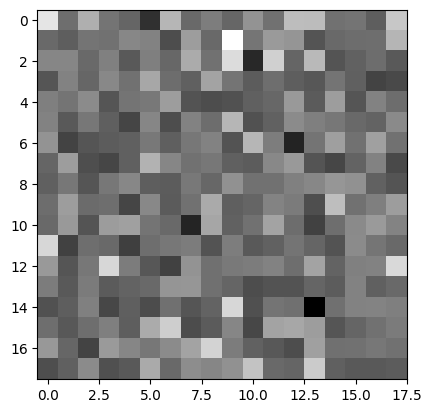

In [5]:
# Display as grayscale image
plt.imshow(cv_18x18, cmap="gray")

# Load images directly into Jupyter notebook

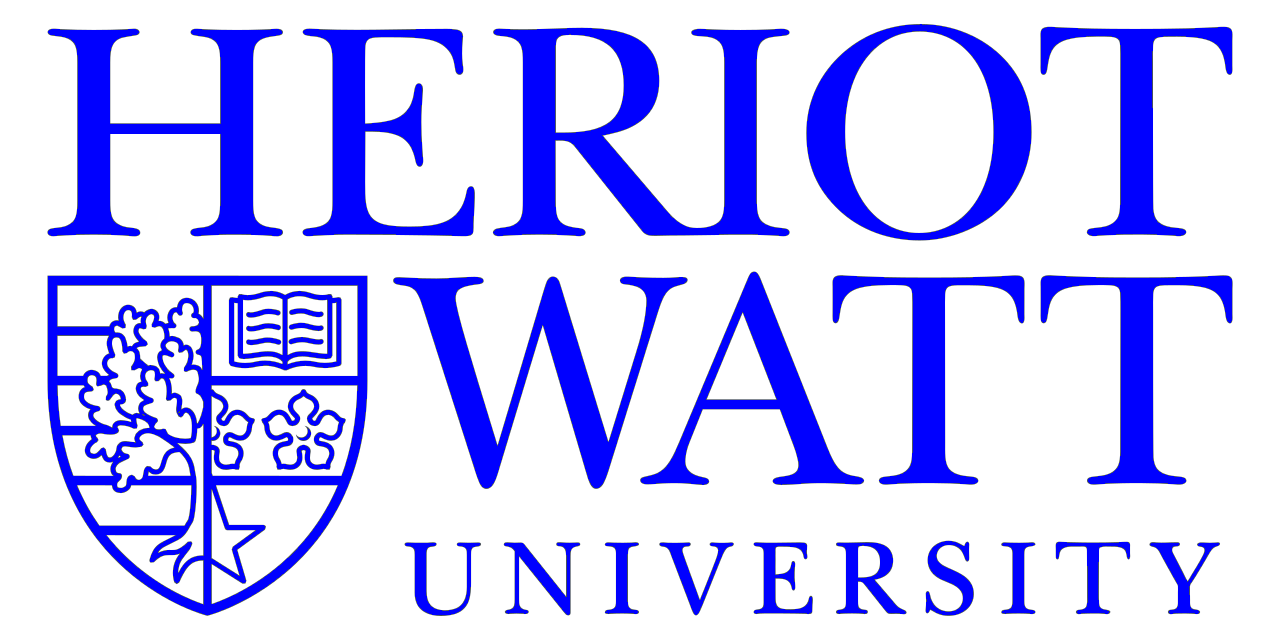

In [6]:
# Load "Heriot-Watt" Logo
Image("images/Heriot-Watt_Logo.png")

# Load colour images using cv

In [7]:
# Load image with OpenCV
hwu_logo = cv.imread("images/Heriot-Watt_Logo.png", cv.IMREAD_COLOR)

print(f"""
    Image size is: , {hwu_logo.shape},
    Data type of image is: , {hwu_logo.dtype}
    """)


    Image size is: , (640, 1280, 3),
    Data type of image is: , uint8
    


Display the HWU logo

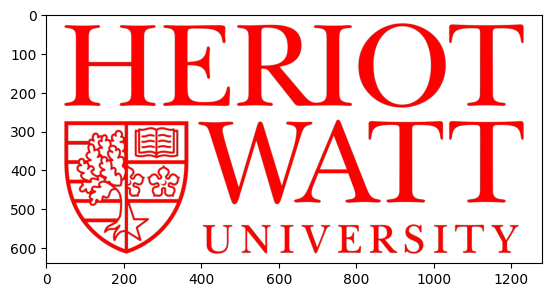

In [8]:
# Display image
plt.imshow(hwu_logo)

## Hmmmmmm, isn't that supposed to be blue?
OpenCV loads images in BGR order **NOT** RGB

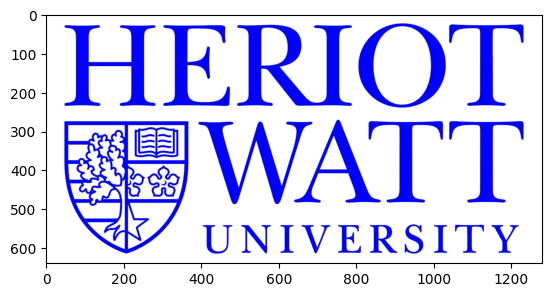

In [9]:
hwu_logo_reversed = hwu_logo[:, :, ::-1]  # Reverse using numpy sliciing
hwu_logo_reversed = cv.cvtColor(hwu_logo, cv.COLOR_BGR2RGB)  # Reverse using opencv colour conversion
plt.imshow(hwu_logo_reversed)

That's better!

# Load Image of TMDs
Be careful with the OpenCV using BGR order to load and save images!

Text(0.5, 1.0, 'RGB')

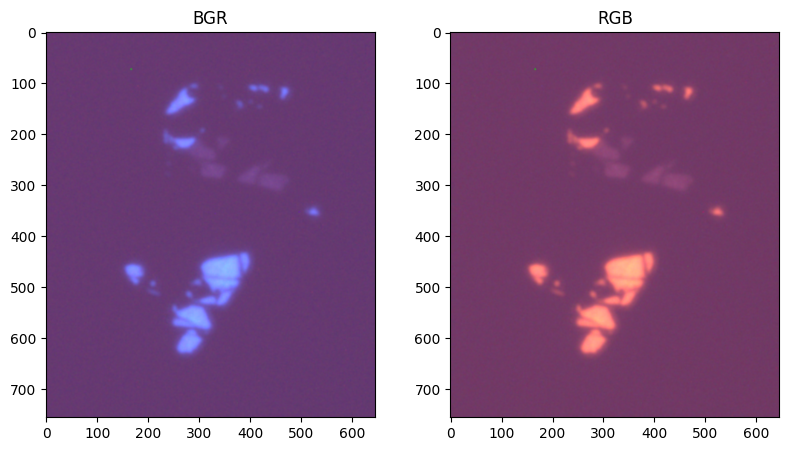

In [10]:
img_bgr = cv.imread("images/TMDs.tif", cv.IMREAD_COLOR)  # Load in BGR order
img_rgb = cv.cvtColor(img_bgr, code=cv.COLOR_BGR2RGB)  # Convert BGR 2 RGB

# Display images
plt.figure(figsize=(20,5))
plt.subplot(141); plt.imshow(img_bgr); plt.title("BGR")
plt.subplot(142); plt.imshow(img_rgb); plt.title("RGB")

# Split images into individual channels

Text(0.5, 1.0, 'RGB')

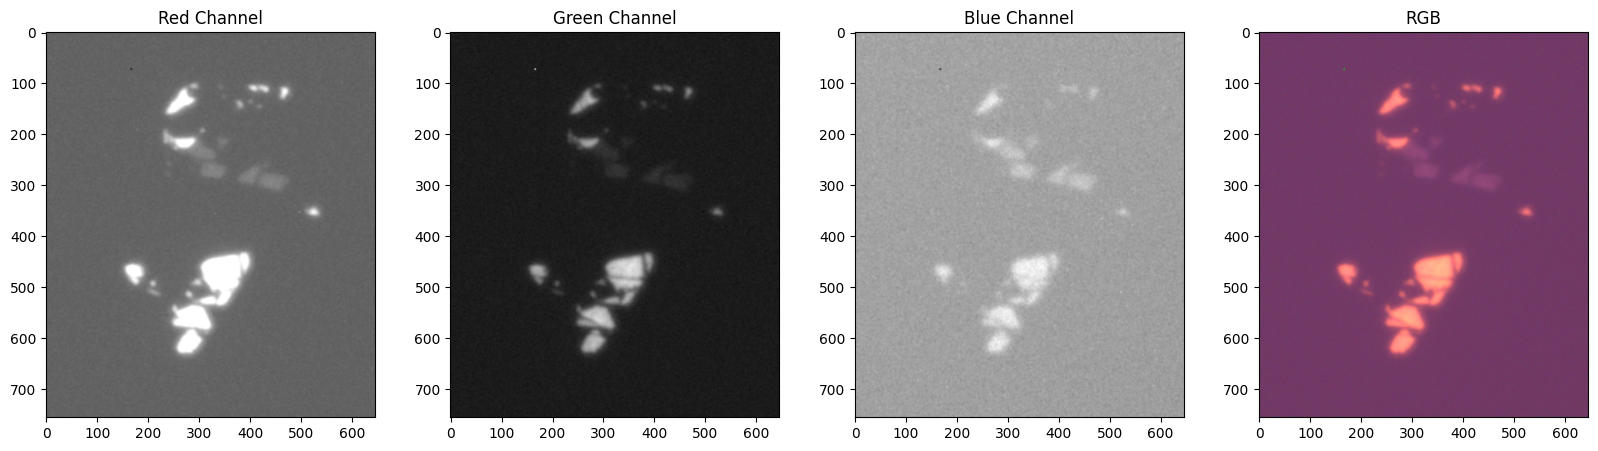

In [11]:
# Load image
tmds_bgr = cv.imread("images/TMDs.tif", cv.IMREAD_COLOR)  # Loads in BGR order!

# Split into B,G,R components
b, g, r = cv.split(tmds_bgr)

# Display channels
cmap = "gray"
plt.figure(figsize=(20,5))
plt.subplot(141); plt.imshow(r, cmap=cmap); plt.title("Red Channel")
plt.subplot(142); plt.imshow(g, cmap=cmap); plt.title("Green Channel")
plt.subplot(143); plt.imshow(b, cmap=cmap); plt.title("Blue Channel")

# Merge individual channels into RGB image
tmds_rgb = cv.merge((r,g,b))
plt.subplot(144); plt.imshow(tmds_rgb, cmap=cmap); plt.title("RGB")


## How about HSV?

**H**ue **S**aturation **V**alue (**HSV**)

**H**ue represents the colour of the pixel

**S**aturation represents the how pure the colour of the pixel is, or how much white is mixed in. 0 Saturation means pure white.

**V**alue(or brightness) is analagous to shining a more intense light onto a coloured object.
 (e.g. shining a bright white light on a red object causes the object to still appear red, just brighter and more intense, while shining a dim light on a red object causes the object to appear darker) 

Text(0.5, 1.0, 'HSV')

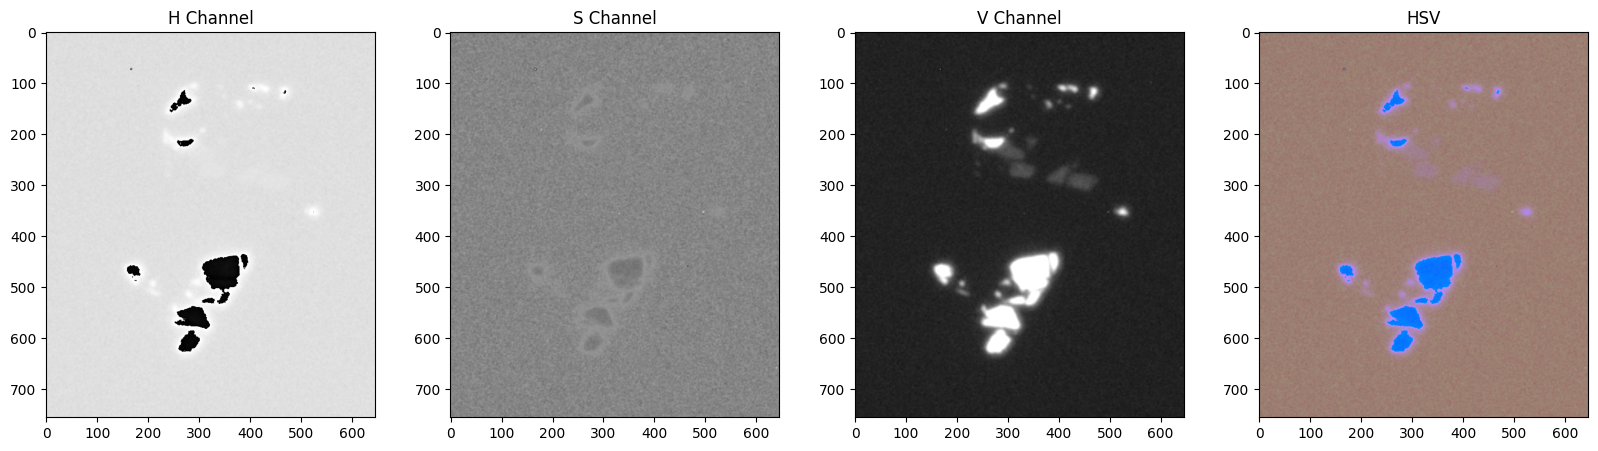

In [12]:
tmds_hsv = cv.cvtColor(tmds_bgr, cv.COLOR_BGR2HSV)  # Convert BGR to HSV
h, s, v = cv.split(tmds_hsv)

plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(h, cmap=cmap); plt.title("H Channel")
plt.subplot(142); plt.imshow(s, cmap=cmap); plt.title("S Channel")
plt.subplot(143); plt.imshow(v, cmap=cmap); plt.title("V Channel")
plt.subplot(144); plt.imshow(tmds_hsv); plt.title("HSV")


## How about L\*a\*b\* (CIELAB)?

**L**uminanance\* **a**\* **b**\* (**L\*a\*b\***)

This colour space was defined by the CIE in 1976 with the intention of producing a "preceptially uniform" colour space. This is to say, small changes in the values of the a\* and b\* channels should yield similarly small changes in the percieved colour.

The **L\*** channel represents perceptual lightness. `Black=0` and `White=100`

The **a\*** and **b\*** channels represent colour through the ratio of 4 colours; red, green, blue, and yellow. The values for these channels are unbounded and can be very large +ve or -ve numbers. For practical purposes these are usually clamped to values in the range of -128 to 127.  

The **a\*** channel represents the ratio of green/red, -ve values are more green, and +ve values are more red

The **b\*** channel represents the ratio of blue/yellow, -ve values are more blue, and +ve values are more yellow

Text(0.5, 1.0, 'LAB')

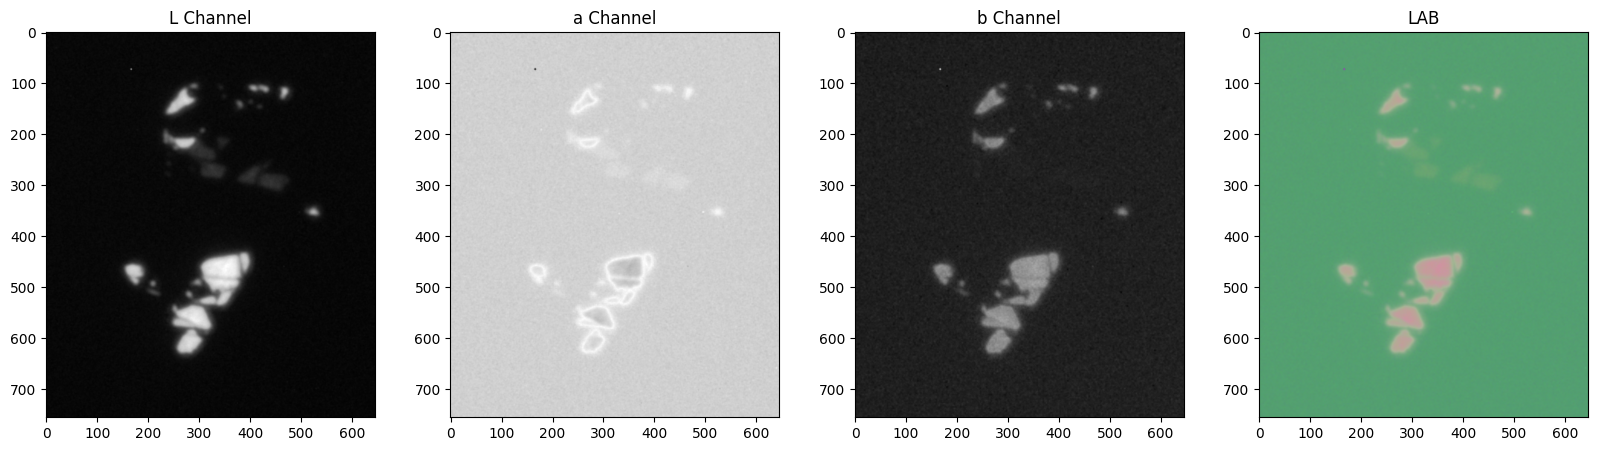

In [13]:
tmds_lab = cv.cvtColor(tmds_bgr, cv.COLOR_BGR2LAB)  # Convert BGR to HSV
l, a, b = cv.split(tmds_lab)

plt.figure(figsize=(20, 5))
plt.subplot(141); plt.imshow(l, cmap=cmap); plt.title("L Channel")
plt.subplot(142); plt.imshow(a, cmap=cmap); plt.title("a Channel")
plt.subplot(143); plt.imshow(b, cmap=cmap); plt.title("b Channel")
plt.subplot(144); plt.imshow(tmds_lab); plt.title("LAB")

There are many more colour spaces to explore, and there will certainly be a preferred colour space for your application.

Be careful, though, as not all colour transformations fully preserve the colour information, sometimes colour information can be lost!

## Saving Images

In [14]:
cv.imwrite("images/TMDs_HSV.tif", tmds_hsv)
cv.imwrite("images/TMDs_Lab.tif", tmds_lab)

True